<a href="https://colab.research.google.com/github/nikeyzdereva/add/blob/main/claster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
dataset = pd.read_csv('mall_customers.csv')
dataset.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Перед кластеризацией необходимо провести визуализацию данных. В данном случае, мы построим диаграмму рассеяния для каждой пары признаков, используя Seaborn:

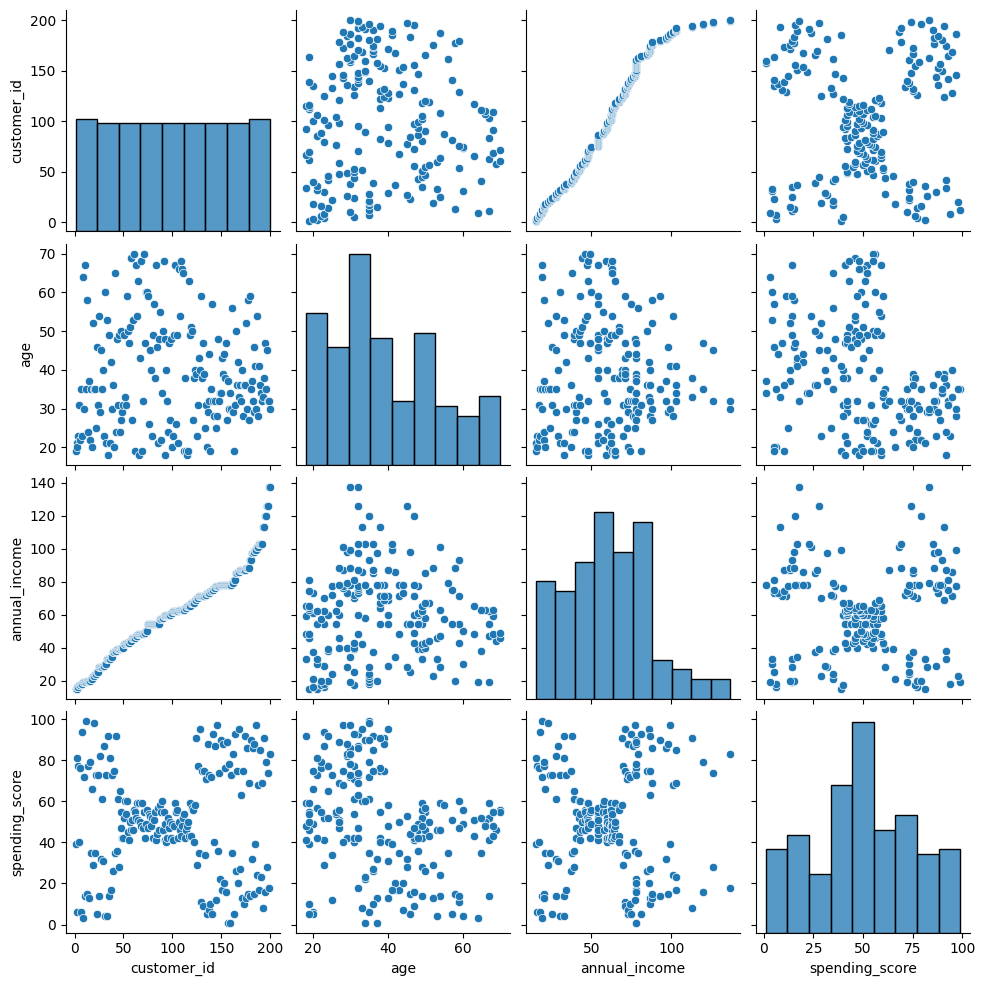

In [51]:
import seaborn as sns

sns.pairplot(dataset)
plt.show()

Мы видим, что некоторые признаки имеют сильную корреляцию, такие как Spendig Score и Age, а некоторые - не имеют, такие как Gender и Annual Income. Также мы видим, что есть возможность выделения нескольких кластеров.

Обработка данных
Для начала, мы удалим ненужные признаки, такие как CustomerID и Gender, так как они не являются числовыми:

In [52]:
X = dataset.iloc[:, 2:].values

Мы будем использовать иерархическую кластеризацию с помощью библиотеки SciPy. Для начала, мы вычисляем матрицу расстояний между парами объектов:

In [53]:
from scipy.spatial.distance import pdist, squareform

dist = pdist(X, metric='euclidean')

Затем мы используем класс linkage для построения матрицы связей между объектами:

In [54]:
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(dist, method='ward')

Теперь мы можем визуализировать матрицу связей с помощью дендрограммы:

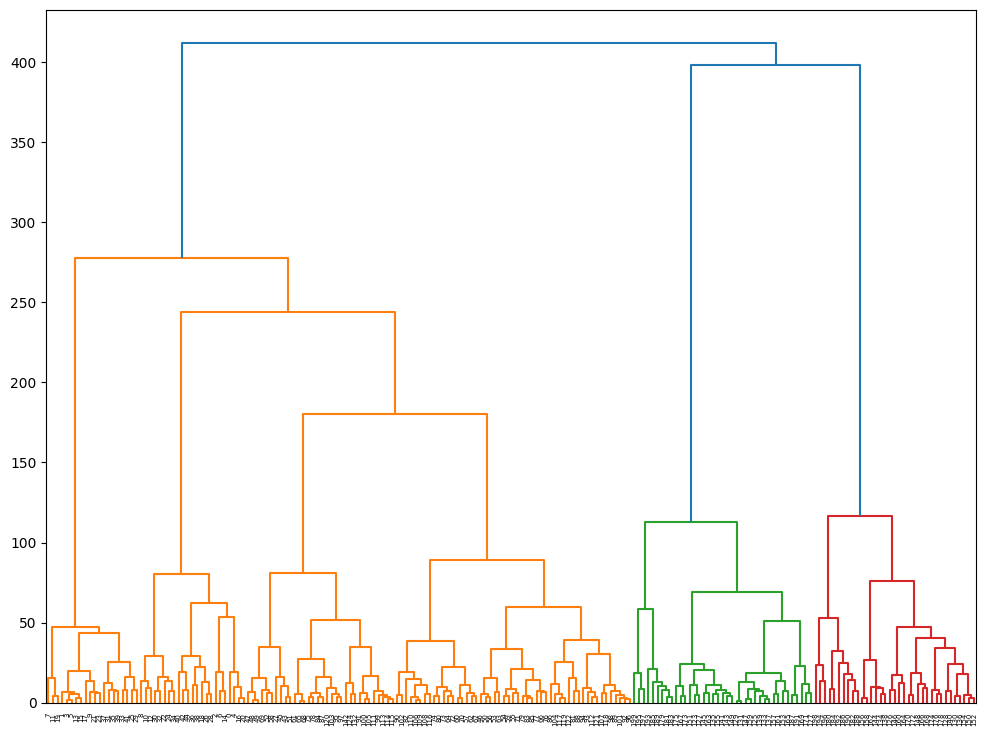

In [55]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,9))
dendrogram(linkage_matrix)
plt.show()

Мы видим, что оптимальное число кластеров для нашего набора данных - 5.

Визуализация кластеров
Теперь мы можем использовать k-средних для разбиения данных на кластеры:

In [56]:
from sklearn.cluster import AgglomerativeClustering

k = 5

clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
clusters = clustering.fit_predict(X)

Теперь мы можем визуализировать полученные кластеры на диаграмме рассеяния:


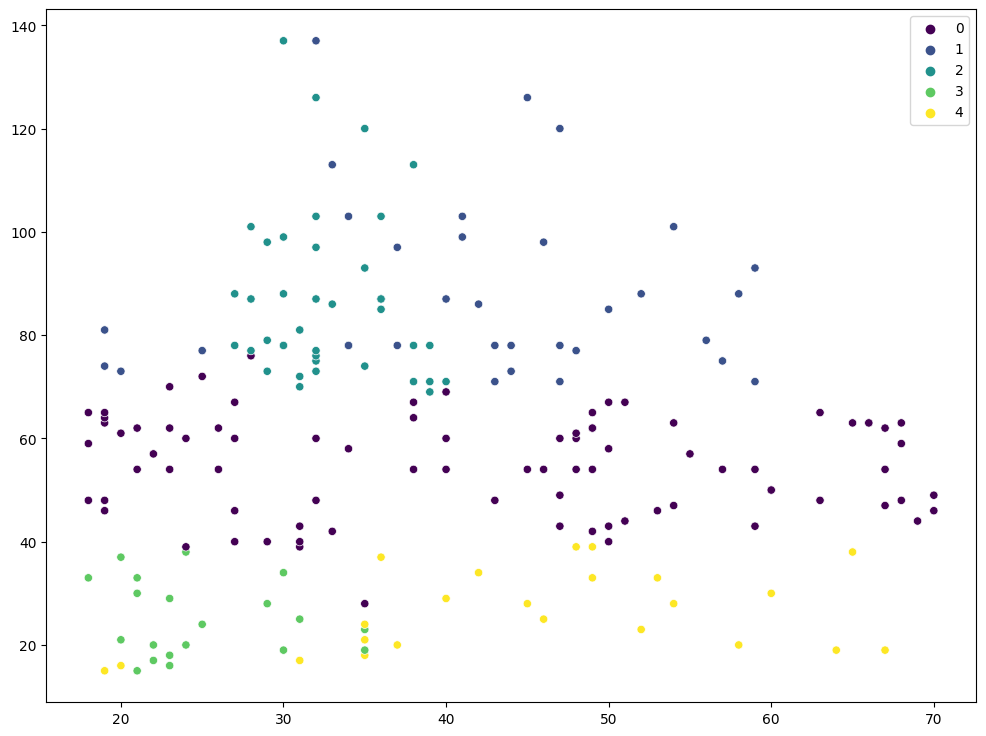

In [58]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis')
plt.show()

Мы видим, что наши данные действительно разбиты на 5 кластеров. Каждый кластер имеет свой диапазон значений для Annual Income и Spending Score.

Таким образом, мы провели иерархическую кластеризацию набора данных Mall Customers на 5 кластеров с помощью дендрограммы.